In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/mille/Desktop/plane_crashes_data.csv')


In [5]:
df.head()
#added a column called survived 

,month,hour,year,location,operator,route,plane_type,aboard,fatalities,summary
0,1,12,1950,"Near Vacas, Bolivia",Military - Bolivian Air Force,Valle grande - Cochabamba,Douglas C-47,32,32,Crashed while en route in the Andes mountains ...
1,3,20,1950,"Minneapolis, Minnesota",Northwest Orient Airlines,Rochester Minn. - Minneapolis,Martin 202,13,13,"Crashed into a flag pole, well marked by red n..."
2,3,14,1950,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,83,80,During the approach to Runway 28 at Llandow Ai...
3,4,23,1950,"Near Atsugi, Japan",Military - U.S. Air Force,Philippines - Japan,Douglas C-54D,35,35,Flew off its prescribed course and crashed int...
4,5,20,1950,"Lagens Air Force Base, Azores",Military - U.S. Air Force,Bermuda - England,Boeing B-29,16,16,Crashed while attempting to land after being d...


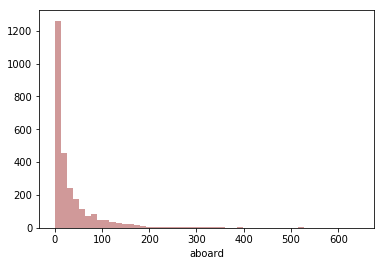

In [6]:
import seaborn as sns

sns.distplot(df['aboard'].dropna(),kde=False,color='darkred',bins=50)

In [31]:
sum_aboard = df['aboard'].sum()
sum_aboard

97029

In [32]:
sum_fatalities = df['fatalities'].sum()
sum_fatalities


69937

In [33]:
print((sum_fatalities)/(sum_aboard))

0.7207845077244948


In [7]:
print('Mean:', df.mean())
print('-------')
print('Std:', df.std())



Mean: month            6.554079
year          1981.927279
aboard          35.817276
fatalities      25.816537
dtype: float64
-------
Std: month          3.532468
year          16.709136
aboard        54.306779
fatalities    42.599461
dtype: float64


In [8]:
aboard_mean = df['aboard'].mean()

aboard_mean

35.817275747508305

In [9]:
fatalities_mean = df['fatalities'].mean()

fatalities_mean

25.816537467700257

In [10]:
diff = (35.817275747508305) - (25.816537467700257)

print('Difference in Mean Aboard v Mean Fatalities:', diff)

Difference in Mean Aboard v Mean Fatalities: 10.000738279808047


In [11]:
size = np.array([len(df['aboard']), len(df['fatalities'])])
sd = np.array([54.306779, 42.599461])

diff_se = (sum(sd ** 2 / size)) ** 0.5  

print('Difference in means divided by std error - T-Value:', diff/diff_se)

Difference in means divided by std error - T-Value: 7.5414248584752634


In [12]:
from scipy.stats import ttest_ind
print('T-statistic and p-value for the 2 sample populations:', ttest_ind(df['aboard'], df['fatalities'], equal_var=False))

T-statistic and p-value for the 2 sample populations: Ttest_indResult(statistic=7.541424865387476, pvalue=5.466642866842131e-14)


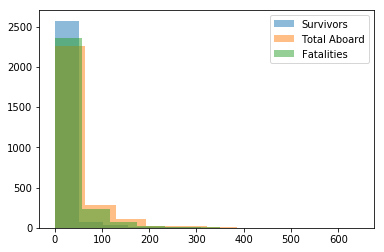

In [13]:
survivors = df['aboard'] - df['fatalities']
survivors

plt.hist(survivors, alpha=0.5, label='Survivors') 
plt.hist(df['aboard'], alpha=0.5, label='Total Aboard')
plt.hist(df['fatalities'], alpha=0.5, label='Fatalities') 


plt.legend(loc='upper right') 
plt.show()

In [29]:
df.describe()



NameError: name 'aboard' is not defined

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


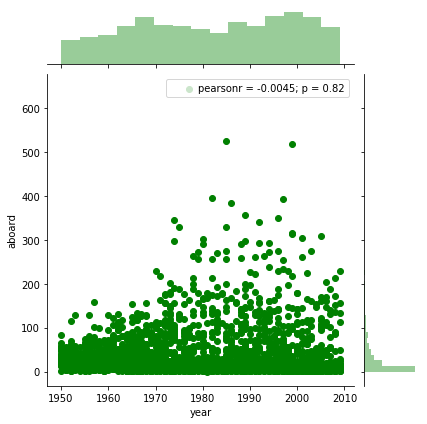

In [15]:
sns.jointplot(x='year',y='aboard',data=df,color='green')

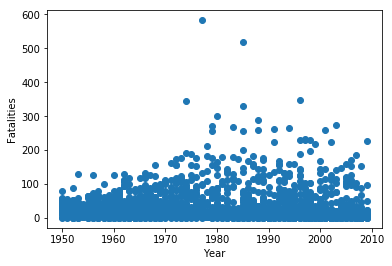

In [16]:
plt.scatter(x=df['year'], y=df['fatalities'])
plt.ylabel('Fatalities')
plt.xlabel('Year')
plt.figure(figsize=(20, 25))

plt.show()

In [17]:
# operator_count = Counter(df['Operator'].dropna()).most_common(10)
# operator_keys = [operator[0] for operator in operator_count]
# operator_val = [operator[1] for operator in operator_count]

# fig,ax = plt.subplots(figsize = (8,6))
# sns.barplot(x = operator_keys, y = operator_val)
# plt.title('Top 10 operator')
# plt.ylabel('Count')
# plt.xlabel('Operator')
# ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora, models

from collections import Counter




C:\Users\mille\Conda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


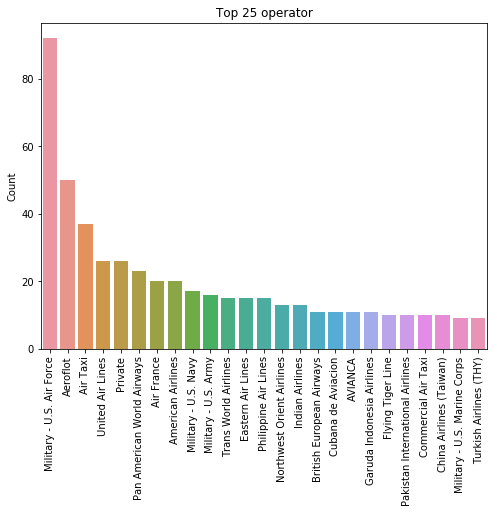

In [19]:
operator_count = Counter(df['operator'].dropna()).most_common(25)
operator_keys = [operator[0] for operator in operator_count]
operator_val = [operator[1] for operator in operator_count]

fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = operator_keys, y = operator_val)
plt.title('Top 25 operator')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


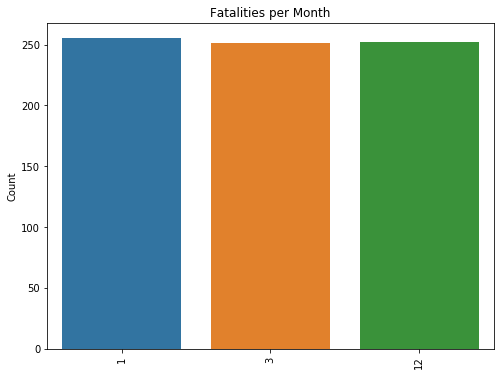

In [28]:
month_count = Counter(df['month'].dropna()).most_common(3)
month_keys = [month[0] for month in month_count]
month_val = [month[1] for month in month_count]

fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = month_keys, y = month_val)
plt.title('Fatalities per Month')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

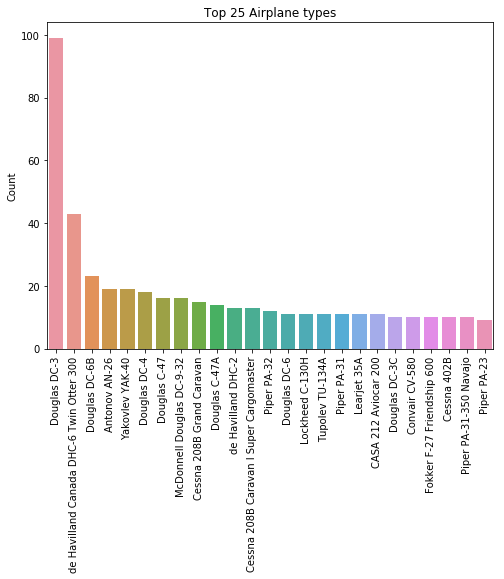

In [21]:
plane_type_count = Counter(df['plane_type'].dropna()).most_common(25)
plane_type_keys = [plane_type[0] for plane_type in plane_type_count]
plane_type_val = [plane_type[1] for plane_type in plane_type_count]

fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = plane_type_keys, y = plane_type_val)
plt.title('Top 25 Airplane types')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

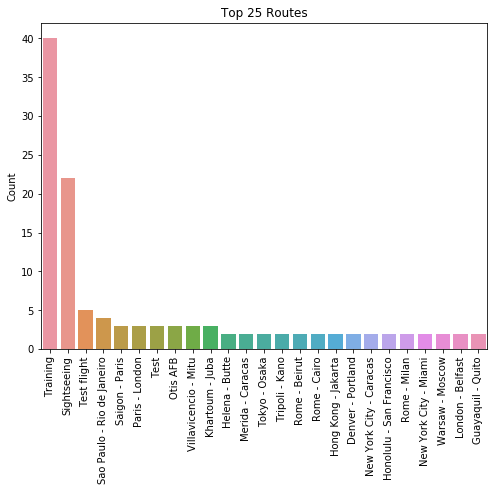

In [22]:
route_count = Counter(df['route'].dropna()).most_common(25)
route_keys = [route[0] for route in route_count]
route_val = [route[1] for route in route_count]

fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = route_keys, y = route_val)
plt.title('Top 25 Routes')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

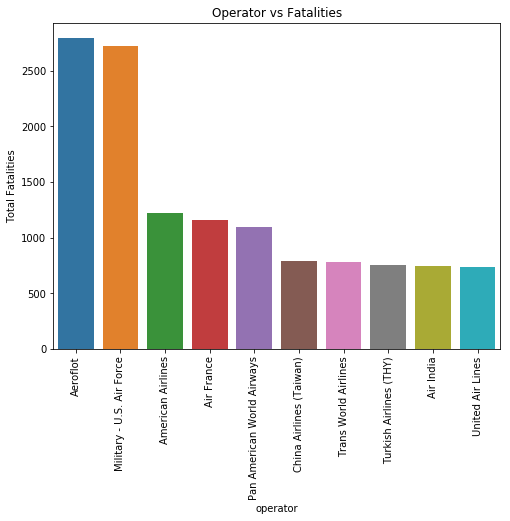

In [23]:
operator_fatal = df[['operator','fatalities']].groupby(['operator']).sum()
operator_fatal = operator_fatal['fatalities'].sort_values(ascending=False)[:10]
operator_fatal_keys = operator_fatal.index
operator_fatal_val = operator_fatal.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = operator_fatal_keys,y =operator_fatal_val)
plt.title('Operator vs Fatalities')
plt.ylabel('Total Fatalities')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

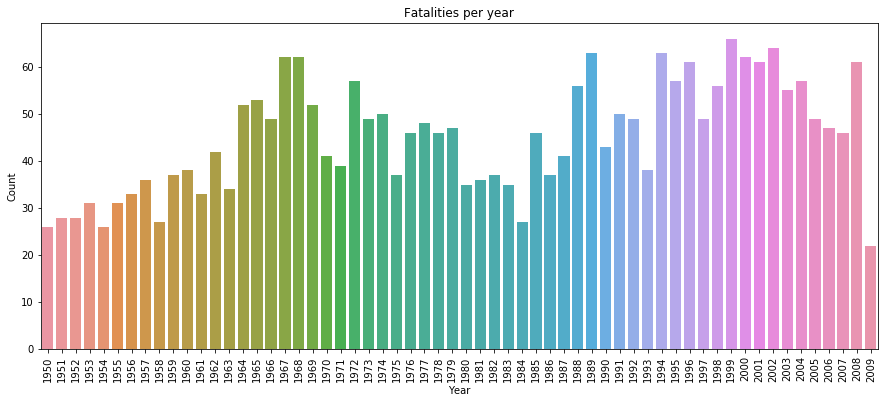

In [24]:
table_count = df.groupby([df['year']])['fatalities'].size()

year = table_count.index
table_count_val = table_count.values
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = year , y = table_count_val)
plt.title('Fatalities per year')
plt.xlabel('Year')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

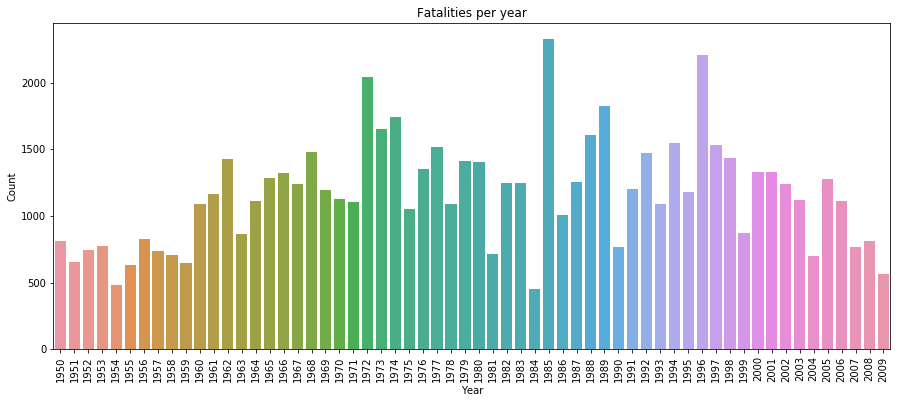

In [25]:
table_count = df.groupby([df['year']])['fatalities'].sum()

year = table_count.index
table_count_val = table_count.values
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = year , y = table_count_val)
plt.title('Fatalities per year')
plt.xlabel('Year')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

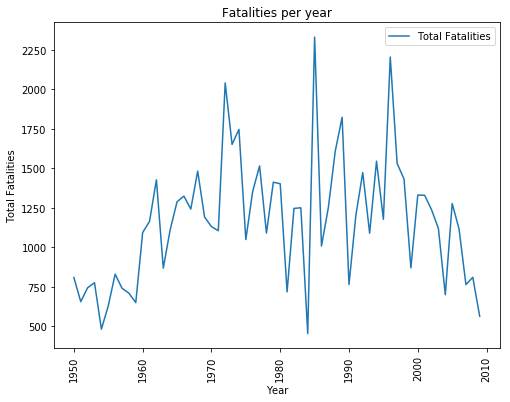

In [26]:
table_count = df[['year','fatalities']].dropna().groupby(['year'])['fatalities'].agg(['sum'])

table_count = table_count.dropna().reset_index()
table_count.columns = ['Year','Total Fatalities']
fig,ax = plt.subplots(figsize=(8,6))
table_count.plot(x = 'Year' , y = 'Total Fatalities',ax=ax)
plt.title('Fatalities per year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [27]:
count = {}
for w in open("/Users/mille/Desktop/summary.txt", "r").read().split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    print("%s was found %d times" % (word, times))



summary was found 1 times
Crashed was found 312 times
while was found 675 times
en was found 179 times
route was found 110 times
in was found 2165 times
the was found 8616 times
Andes was found 6 times
mountains was found 32 times
after was found 956 times
encountering was found 18 times
a was found 3077 times
thunderstorm. was found 18 times
"Crashed was found 110 times
into was found 1483 times
flag was found 1 times
pole, was found 3 times
well was found 16 times
marked was found 3 times
by was found 612 times
red was found 1 times
neon was found 1 times
obstruction was found 4 times
lights, was found 5 times
on was found 998 times
approach was found 454 times
blowing was found 5 times
snow. was found 11 times
Pilot's was found 8 times
attempt was found 65 times
to was found 3561 times
land was found 199 times
visual was found 106 times
rather was found 16 times
than was found 54 times
ILS was found 60 times
reference was found 29 times
ground was found 209 times
was was found 1676 

La-7 was found 1 times
survivors was found 10 times
rescued was found 6 times
Force. was found 1 times
"Flew was found 9 times
mountain, was found 14 times
35 was found 23 times
McGrath." was found 1 times
Maria. was found 2 times
opposite was found 7 times
carry was found 9 times
Bermuda was found 1 times
having was found 22 times
right, was found 7 times
sea." was found 7 times
16 was found 9 times
Mason was found 1 times
City, was found 4 times
Iowa was found 2 times
penetrating was found 8 times
endeavouring was found 1 times
traverse was found 1 times
very was found 20 times
rain, was found 20 times
divergent was found 1 times
winds, was found 8 times
ground." was found 24 times
Sea was found 12 times
showers was found 8 times
practice was found 3 times
approaches was found 6 times
Ellsworth was found 1 times
sixth was found 1 times
attempt. was found 19 times
slammed was found 5 times
retracted was found 8 times
set was found 19 times
degrees. was found 7 times
"Less was found 2 

1,400 was found 2 times
Nonfunctioning was found 1 times
VOR was found 16 times
information was found 21 times
given was found 14 times
automatidirection was found 2 times
finder was found 1 times
atmosphericonditions. was found 1 times
Chateau was found 1 times
Chantilly." was found 1 times
Bombay, was found 1 times
India, was found 1 times
3,600 was found 3 times
available." was found 2 times
height. was found 7 times
slow was found 11 times
psycho-physical was found 1 times
reaction was found 5 times
fatigue, was found 6 times
perception was found 4 times
danger was found 1 times
execution was found 5 times
accident, was found 9 times
minimize was found 1 times
consequences." was found 1 times
52 was found 1 times
Bangkok was found 2 times
jettisoned, was found 1 times
departure. was found 5 times
three-engine was found 3 times
proceeded was found 3 times
commenced was found 4 times
flare was found 2 times
centerline. was found 6 times
left. was found 5 times
550 was found 2 times
p

designated was found 1 times
and/or was found 6 times
planning, was found 6 times
copilot. was found 1 times
obtain/maintain was found 2 times
Unwanted was found 1 times
high-speed was found 2 times
capacity was found 2 times
overcome. was found 1 times
element was found 1 times
sequence was found 4 times
specifically was found 2 times
However, was found 12 times
malfunctions was found 1 times
which, was found 3 times
undetected was found 6 times
lead was found 3 times
porpoised was found 2 times
lake. was found 3 times
wake was found 10 times
schedule was found 1 times
recently was found 3 times
jet. was found 3 times
(blind was found 1 times
canyon). was found 1 times
sightseeing was found 22 times
Pilot-in-command was found 2 times
Unwarranted was found 2 times
control, was found 8 times
shutdown was found 1 times
pumps was found 1 times
supplying was found 1 times
hydraulipressure was found 1 times
concurrent was found 1 times
restoration was found 1 times
inadequacy was found 2 ti

"Procedural was found 1 times
O-ring was found 1 times
seal was found 1 times
trouble, was found 3 times
later." was found 4 times
Ban was found 1 times
ta was found 1 times
Khli was found 1 times
waved was found 2 times
Toronto was found 2 times
intermediate was found 4 times
Worth. was found 1 times
lavatory, was found 1 times
origin, was found 1 times
Fatalities was found 1 times
inhalation was found 1 times
exit was found 3 times
Underestimation was found 1 times
quicker was found 1 times
folk was found 1 times
Stan was found 1 times
Rogers, was found 1 times
33, was found 1 times
attending was found 1 times
Kerrville was found 1 times
Folk was found 1 times
Festival was found 1 times
helping was found 1 times
safety." was found 1 times
Formosa was found 1 times
Strait was found 1 times
instrumented was found 1 times
mountian was found 1 times
Andean was found 2 times
Cuenca. was found 1 times
Under-qualification was found 1 times
Ottawa was found 1 times
Edmonton was found 1 times

islands." was found 1 times
burn. was found 2 times
linkage, was found 1 times
worn/disconnected was found 1 times
arm, was found 1 times
Texel, was found 1 times
mud-flat. was found 1 times
inevitable was found 1 times
decrease was found 2 times
Lima, was found 1 times
Peru. was found 1 times
adhesive was found 3 times
tape was found 3 times
statiports, was found 2 times
cleaning, was found 1 times
indicators was found 1 times
employee was found 1 times
negligent was found 1 times
homicide was found 1 times
jail." was found 1 times
3,200 was found 1 times
altitude/clearance was found 6 times
high/mountainous was found 1 times
"31-7952246The was found 1 times
Charlo was found 1 times
conserve was found 1 times
flowers was found 2 times
Dolorosa was found 1 times
district, was found 1 times
climb-out." was found 1 times
Mil was found 1 times
Mi-8 was found 1 times
Elena." was found 1 times
FL100 was found 1 times
FL240. was found 1 times
crankshaft was found 1 times
ruptured. was found 